In [1]:
import pandas as pd
from IPython.display import display
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
trippub=pd.read_csv("trippub.csv")

In [3]:
display(trippub)

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,VEHID,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,TREGRTM,WHODROVE,WHYFROM,LOOP_TRIP,TRPHHVEH,HHMEMDRV,HH_ONTD,NONHHCNT,NUMONTRP,PSGR_FLG,PUBTRANS,TRIPPURP,DWELTIME,TDWKND,VMT_MILE,DRVR_FLG,WHYTRP1S,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,ONTD_P13,TDCASEID,TRACC_WLK,TRACC_POV,TRACC_BUS,TRACC_CRL,TRACC_SUB,TRACC_OTH,TREGR_WLK,TREGR_POV,TREGR_BUS,TREGR_CRL,TREGR_SUB,TREGR_OTH,WHYTO,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,GASPRICE,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,R_AGE,EDUC,R_SEX,PRMACT,PROXY,WORKER,DRIVER,WTTRDFIN,WHYTRP90,TRPMILAD,R_AGE_IMP,R_SEX_IMP,VEHTYPE,OBHUR,DBHUR,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,3,-1,-1,-1,-1,-1,1,1,2,1,1,1,0,1,2,2,HBO,295,2,5.244,1,20,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.000000e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,19,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,67,3,2,6,1,2,1,75441.90580,5,5.847584,67,2,1,T,T,50,1500,750,750,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,3,-1,-1,-1,-1,-1,1,19,2,1,1,1,0,1,2,2,HBO,-9,2,5.149,1,1,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.000000e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,67,3,2,6,1,2,1,75441.90580,5,5.741650,67,2,1,T,T,50,750,300,350,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,5,-1,-1,-1,-1,-1,2,3,2,1,1,1,0,1,2,2,HBW,540,2,84.004,1,1,2,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.000000e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,66,3,1,1,2,1,1,71932.64581,1,90.178294,66,1,4,S,T,40,1500,750,750,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,5,-1,-1,-1,-1,-1,2,1,2,1,1,1,0,1,2,2,HBW,-9,2,81.628,1,10,2,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.000000e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,66,3,1,1,2,1,1,71932.64581,1,87.627658,66,1,4,T,S,50,1500,750,750,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,1,-1,-1,-1,-1,-1,3,1,2,1,1,1,0,1,2,2,HBO,330,2,2.250,1,20,2,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.000000e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,8,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,28,2,2,5,2,2,1,80122.68674,5,2.508975,28,2,1,T,T,50,1500,750,750,20,750,300,50,750,300,350,60,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,50515573,1,1,810,837,27,1.168,1,0,0,-1,-1,-1,-1,-1,-1,-1,1,2,2,-1,1,0,1,-1,2,HBW,283,2,-1.000,-1,10,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.051560e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,1,0,10,1,DC,11,1,1,201609,1,1,1,5,1,1,5,1,234.2,5,3,51,1,2,47900,1,52,5,1,1,1,1,1,223357.45740,1,1.168000,52,1,-1,U,U,70,30000,30000,5000,70,30000,17000,70,7000,7000,5000,80,17000,17000
923568,50515573,1,2,1320,1328,8,0.238,1,0,0,-1,-1,-1,-1,-1,-1,-1,3,2,2,-1,1,0,1,-1,2,NHB,47,2,-1.000,-1,50,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5.051560e+11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,16,3,1,1,0,10,1,DC,11,1,1,201609,1,1,1,5,1,1,5,1,234.2,5,3,51,1,2,47900,1,52,5,1,1,1,1,1,223357.45740,10,0.238000,52,1,-1,U,U,70,7000,7000,5000,80,17000,17000,70,7000,7000,5000,60,3000,3

# Feature Engineering

In [4]:
trippub1 = pd.DataFrame(trippub, columns =['TRPTRANS','DWELTIME', 'STRTTIME', \
                                           'TRVLCMIN','TDWKND', 'TRPMILES', 
                                           'TRIPPURP', 'R_AGE','R_SEX','DRIVER',\
                                           'HHFAMINC', 'HHVEHCNT', 'HHSTFIPS', 
                                           'DTEEMPDN','DTPPOPDN'])

In [5]:
# Filter for New York
trippub1=trippub1[trippub1['HHSTFIPS']==36]

In [6]:
# Drop negative values for Trip Mode: TRPTRANS Column
trippub1=trippub1.drop(trippub1[trippub1['TRPTRANS']<0].index)
trippub1['TRPTRANS'].value_counts()

3     50830
4     29622
1     13989
6      9796
5      7768
10     2040
16     1412
11     1338
2       871
15      494
17      480
97      422
13      241
18      222
19      180
8       141
20      120
12      105
9        89
7        27
14       20
Name: TRPTRANS, dtype: int64

In [7]:
# Simplifying the travel mode into: car, public transit, walk, bike
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [3,4,5,6,8],'car')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [18,9,17],'car')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [1],'walk')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [2],'bike')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [10],'school bus')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [11,15,16],'public transit')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [12,13,14,20],'other transit')
trippub1['TRPTRANS']=trippub1 ['TRPTRANS'].replace ( [19,97,7],'other')
trippub1.drop(trippub1.index[trippub1['TRPTRANS']=='other'], inplace=True)
trippub1.drop(trippub1.index[trippub1['TRPTRANS']=='school bus'], inplace=True)
trippub1.drop(trippub1.index[trippub1['TRPTRANS']=='other transit'], inplace=True)

In [8]:
# Obtaining the percent breakdown
trippub1['TRPTRANS'].value_counts()

car               98948
walk              13989
public transit     3244
bike                871
Name: TRPTRANS, dtype: int64

In [9]:
#drop negative values for Trip Purpose: TRIPPURP Column
trippub1['TRIPPURP'].value_counts()
trippub1.drop(trippub1.index[trippub1['TRIPPURP']=='-9'], inplace=True)

In [10]:
#Grouping TRIPPURP using numerical categories
trippub1['TRIPPURP']=trippub1 ['TRIPPURP'].replace ('NHB',1)
trippub1['TRIPPURP']=trippub1 ['TRIPPURP'].replace ('HBSHOP',2)
trippub1['TRIPPURP']=trippub1 ['TRIPPURP'].replace ('HBO',3)
trippub1['TRIPPURP']=trippub1 ['TRIPPURP'].replace ('HBSOCREC',4)
trippub1['TRIPPURP']=trippub1 ['TRIPPURP'].replace ('HBW',5)
trippub1['TRIPPURP'] = trippub1['TRIPPURP'].astype(int)

In [11]:
trippub1.dtypes

TRPTRANS     object
DWELTIME      int64
STRTTIME      int64
TRVLCMIN      int64
TDWKND        int64
TRPMILES    float64
TRIPPURP      int32
R_AGE         int64
R_SEX         int64
DRIVER        int64
HHFAMINC      int64
HHVEHCNT      int64
HHSTFIPS      int64
DTEEMPDN      int64
DTPPOPDN      int64
dtype: object

In [12]:
trippub1['TRIPPURP'].value_counts()

1    39207
2    25913
3    21678
4    15630
5    14622
Name: TRIPPURP, dtype: int64

In [13]:
trippub1['TDWKND'].value_counts()

2    82249
1    34801
Name: TDWKND, dtype: int64

In [14]:
#Drop negative values for Dwell Time: DWELTIME Column
trippub1.drop(trippub1.index[trippub1['DWELTIME']<0], inplace=True)
trippub1['DWELTIME'].value_counts()

5      5340
10     4808
15     4072
30     3214
20     2658
       ... 
923       1
807       1
743       1
694       1
507       1
Name: DWELTIME, Length: 809, dtype: int64

In [15]:
#Drop negative values for Travel Time: TRVLCMIN Column
trippub1.drop(trippub1.index[trippub1['TRVLCMIN']<=0], inplace=True)
trippub1['TRVLCMIN'].value_counts()

10     13823
5      12767
15     12762
30      5964
20      5923
       ...  
344        1
390        1
335        1
153        1
238        1
Name: TRVLCMIN, Length: 262, dtype: int64

In [16]:
#Categorizing Start time to either peak time = 1 or non peak time = 2
q1=trippub1['STRTTIME'] >= 800
q2=trippub1['STRTTIME'] <=1000

trippub1.loc[q1 & q2,'STRTTIME'] = 1

q3=trippub1['STRTTIME'] >= 1700
q4=trippub1['STRTTIME'] <=1900 

trippub1.loc[q3 & q4,'STRTTIME'] = 1

trippub1.loc[trippub1['STRTTIME']!=1,'STRTTIME'] = 2
trippub1['STRTTIME'].value_counts()

2    63726
1    25547
Name: STRTTIME, dtype: int64

In [17]:
#Drop negative values for Driver: DRIVER Column
trippub1.drop(trippub1.index[trippub1['DRIVER']<=0], inplace=True)
trippub1['DRIVER'].value_counts()

1    78853
2     5846
Name: DRIVER, dtype: int64

In [18]:
#Drop negative values for Sex: R_SEX Column
trippub1.drop(trippub1.index[trippub1['R_SEX']<=0], inplace=True)
trippub1['R_SEX'].value_counts()

2    44622
1    40004
Name: R_SEX, dtype: int64

In [19]:
#Drop negative values for Age: R_AGE Column
trippub1.drop(trippub1.index[trippub1['R_AGE']<=0], inplace=True)
trippub1['R_AGE'].value_counts()

65    2583
63    2279
64    2269
62    2249
60    2160
      ... 
84     395
85     297
87     278
86     275
88     193
Name: R_AGE, Length: 75, dtype: int64

In [20]:
#Drop negative values for Household Income: HHFAMINC Column
trippub1.drop(trippub1.index[trippub1['HHFAMINC']<=0], inplace=True)
trippub1['HHFAMINC'].value_counts()

6     15041
7     12426
8     10283
5      8927
11     6525
4      6433
9      6236
10     5928
3      5268
2      2542
1      2337
Name: HHFAMINC, dtype: int64

In [21]:
#Drop negative values for Trip Miles: TRPMILES Column
trippub1.drop(trippub1.index[trippub1['TRPMILES']<=0], inplace=True)
trippub1['TRPMILES'].value_counts()

1.000     230
2.000     140
0.111     140
0.500     119
0.222     103
         ... 
14.202      1
17.882      1
13.234      1
17.332      1
14.909      1
Name: TRPMILES, Length: 20204, dtype: int64

In [22]:
#Drop negative values for Destination Employment Density: DTEEMPDN Column
trippub1.drop(trippub1.index[trippub1['DTEEMPDN']<=0], inplace=True)
trippub1['DTEEMPDN'].value_counts()

750     14817
1500    12707
25      11363
5000     9816
350      9304
150      8367
3000     8353
75       6656
Name: DTEEMPDN, dtype: int64

In [23]:
#Drop negative values for Destination Population Density: DTPPOPDN Column
trippub1.drop(trippub1.index[trippub1['DTPPOPDN']<=0], inplace=True)
trippub1['DTPPOPDN'].value_counts()

300      15975
1500     14359
3000     13239
7000     11173
50       10213
750       8064
30000     4625
17000     3735
Name: DTPPOPDN, dtype: int64

In [24]:
#Drop the state ID column, as we have already filtered it to New York and reset the index
trippub1.drop(columns = ['HHSTFIPS'], inplace=True)
trippub1.reset_index(drop=True)
df=trippub1.reset_index(drop=True)

In [25]:
df.head(5)

,TRPTRANS,DWELTIME,STRTTIME,TRVLCMIN,TDWKND,TRPMILES,TRIPPURP,R_AGE,R_SEX,DRIVER,HHFAMINC,HHVEHCNT,DTEEMPDN,DTPPOPDN
0,car,55,2,15,2,3.395,4,45,2,1,10,2,350,750
1,car,15,2,15,2,3.395,4,45,2,1,10,2,5000,17000
2,car,25,2,10,2,1.059,4,45,2,1,10,2,5000,17000
3,car,45,1,10,2,1.014,4,45,2,1,10,2,5000,17000
4,car,295,1,20,2,4.291,5,45,2,1,10,2,750,1500


In [26]:
df.describe()

,DWELTIME,STRTTIME,TRVLCMIN,TDWKND,TRPMILES,TRIPPURP,R_AGE,R_SEX,DRIVER,HHFAMINC,HHVEHCNT,DTEEMPDN,DTPPOPDN
count,81383.00000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000,81383.000000
mean,113.05973,1.714756,19.474694,1.720175,7.850728,2.292371,53.891243,1.526203,1.068749,6.597680,2.050981,1346.804308,4338.285023
std,152.23105,0.451533,24.715164,0.448916,16.946951,1.407618,17.261790,0.499316,0.253028,2.519368,1.174558,1611.165095,7365.618522
min,1.00000,1.000000,1.000000,1.000000,0.001000,1.000000,15.000000,1.000000,1.000000,1.000000,0.000000,25.000000,50.000000
25%,15.00000,1.000000,7.000000,1.000000,1.043000,1.000000,41.000000,1.000000,1.000000,5.000000,1.000000,150.000000,300.000000
50%,50.00000,2.000000,14.000000,2.000000,3.068000,2.000000,57.000000,2.000000,1.000000,7.000000,2.000000,750.000000,1500.000000
75%,140.00000,2.000000,22.000000,2.000000,8.074500,3.000000,67.000000,2.000000,1.000000,8.000000,3.000000,1500.000000,3000.000000
max,1240.00000,2.000000,709.000000,2.000000,436.310000,5.000000,92.000000,2.000000,2.000000,11.000000,12.000000,5000.000000,30000.000000


In [27]:
df['TRPTRANS'].value_counts()/81401*100

car               84.700434
walk              11.972826
public transit     2.641245
bike               0.663383
Name: TRPTRANS, dtype: float64

In [28]:
df['STRTTIME'].value_counts()/81401*100

2    71.459810
1    28.518077
Name: STRTTIME, dtype: float64

In [29]:
df['TDWKND'].value_counts()/81401*100

2    72.001572
1    27.976315
Name: TDWKND, dtype: float64

In [30]:
df['TRIPPURP'].value_counts()/81401*100

1    43.121092
2    18.390437
3    16.278670
5    11.697645
4    10.490043
Name: TRIPPURP, dtype: float64

In [31]:
df['R_SEX'].value_counts()/81401*100

2    52.608690
1    47.369197
Name: R_SEX, dtype: float64

In [32]:
df['DRIVER'].value_counts()/81401*100

1    93.104507
2     6.873380
Name: DRIVER, dtype: float64

# Supervised Learning

In [33]:
X = df.drop(['TRPTRANS'],axis=1)
y = df['TRPTRANS']
X = X.reset_index(drop=True)
y=y.reset_index(drop=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [35]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

          bike       0.12      0.15      0.14       155
           car       0.96      0.96      0.96     20718
public transit       0.54      0.56      0.55       659
          walk       0.76      0.77      0.76      2883

      accuracy                           0.92     24415
     macro avg       0.60      0.61      0.60     24415
  weighted avg       0.92      0.92      0.92     24415



In [37]:
print(confusion_matrix(y_test,predictions))

[[   24    71    19    41]
 [   87 19817   227   587]
 [   16   204   371    68]
 [   68   538    67  2210]]


## Random Forest

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(classification_report(y_test,rfc_pred))

                precision    recall  f1-score   support

          bike       1.00      0.07      0.13       155
           car       0.96      0.98      0.97     20718
public transit       0.74      0.60      0.66       659
          walk       0.85      0.82      0.83      2883

      accuracy                           0.94     24415
     macro avg       0.89      0.62      0.65     24415
  weighted avg       0.94      0.94      0.94     24415



In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[   11    96    12    36]
 [    0 20298    79   341]
 [    0   220   393    46]
 [    0   473    48  2362]]


## Gradient Boosting


In [42]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
clf_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.937784149088675

In [43]:
print(classification_report(y_test,clf_pred))

                precision    recall  f1-score   support

          bike       0.28      0.05      0.08       155
           car       0.96      0.98      0.97     20718
public transit       0.71      0.59      0.64       659
          walk       0.82      0.79      0.81      2883

      accuracy                           0.94     24415
     macro avg       0.69      0.60      0.62     24415
  weighted avg       0.93      0.94      0.93     24415



## Bagging Classifier

In [44]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)

In [45]:
ytest_pred=bag_model.predict(X_test)

In [46]:
print(classification_report(y_test,ytest_pred))

                precision    recall  f1-score   support

          bike       0.86      0.12      0.21       155
           car       0.97      0.98      0.97     20718
public transit       0.73      0.62      0.67       659
          walk       0.84      0.84      0.84      2883

      accuracy                           0.95     24415
     macro avg       0.85      0.64      0.68     24415
  weighted avg       0.95      0.95      0.94     24415



Conclusion: Overall the ensemble methods (Bagging, Random forest, Gradient boosting tree) all outperform decision tree on the test set in terms of accuracy. This is of no surprise as decision tree tends to overfit to training set. Our accuracy for the ensemble methods have overall accuracy roughly 94 to 95%.

# Unsupervised Learning

In [47]:
unsup_df = df.drop(['TRPTRANS'],axis=1)

###  Find Optimal Clusters

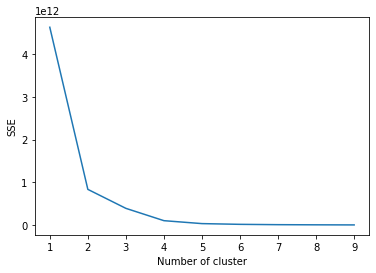

In [48]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(unsup_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

K = 4 seem to be pretty good number of clusters. Let's use k = 4 as K=5 almost provides no additional gain in SSE.

In [49]:
kmeans = KMeans(n_clusters=4).fit(unsup_df)

In [50]:
clusters = kmeans.predict(unsup_df)
unsup_df["Cluster"] = clusters

## Visualize our clusters with cluster in 2D

In [51]:
cluster0 = unsup_df[unsup_df["Cluster"] == 0]
cluster1 = unsup_df[unsup_df["Cluster"] == 1]
cluster2 = unsup_df[unsup_df["Cluster"] == 2]

In [52]:
def rSubset(arr, r):
    return list(combinations(arr, r))

In [53]:
unsup_col = list(unsup_df.columns)
unsup_col.remove('Cluster')

In [54]:
list_of_combo_columns = rSubset(unsup_col,2)

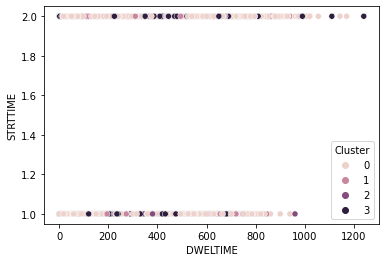

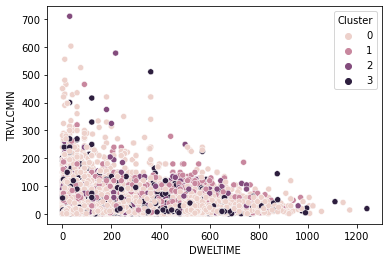

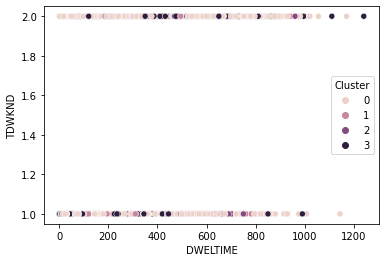

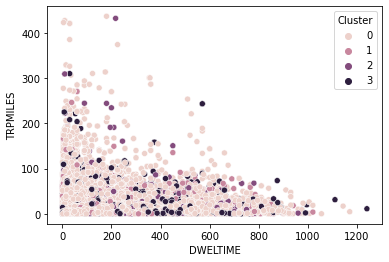

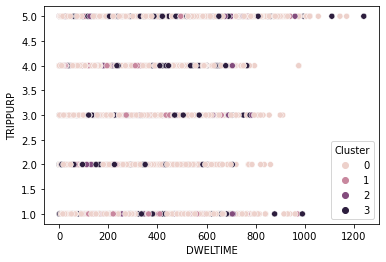

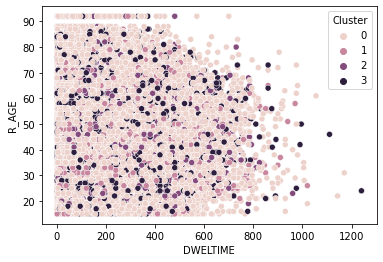

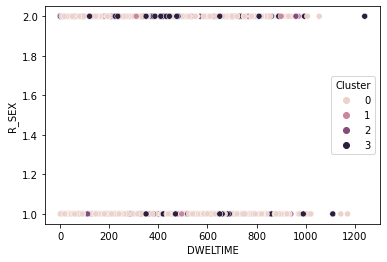

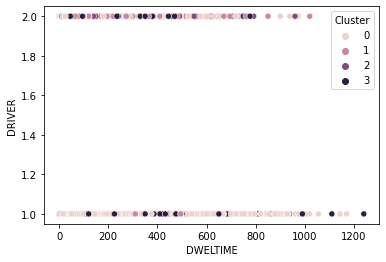

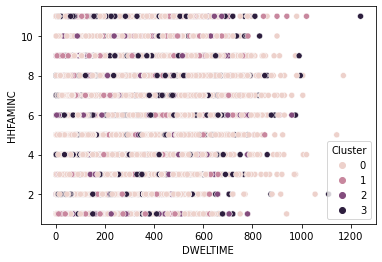

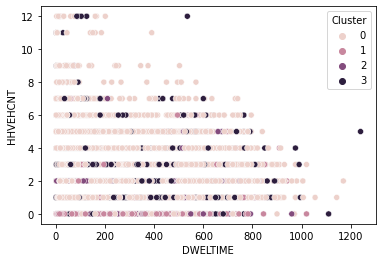

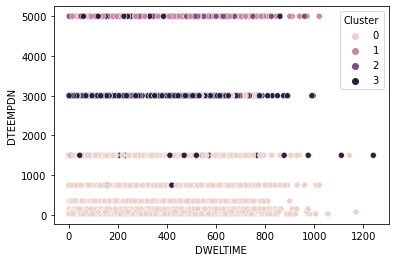

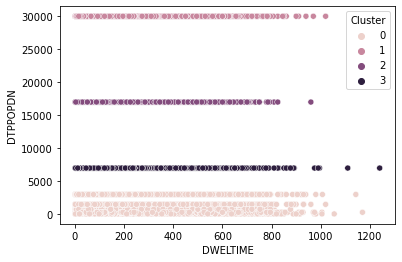

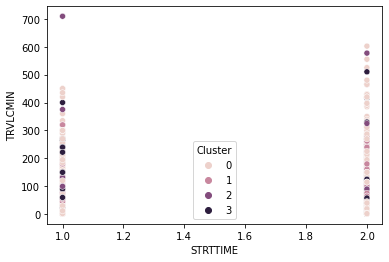

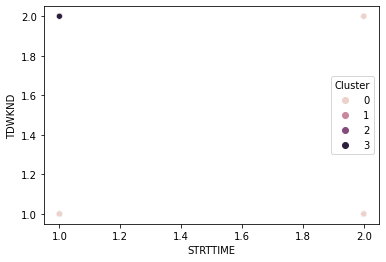

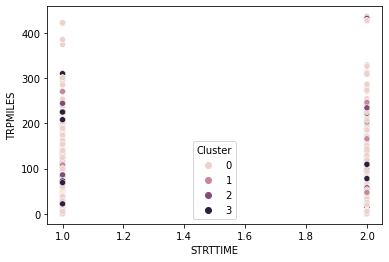

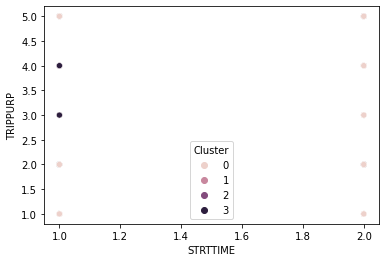

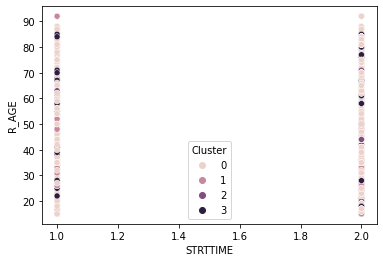

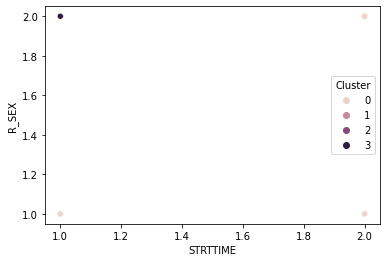

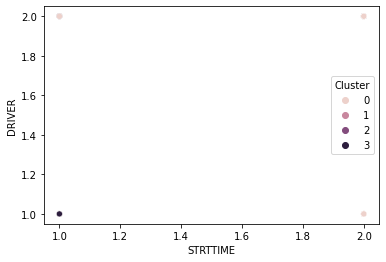

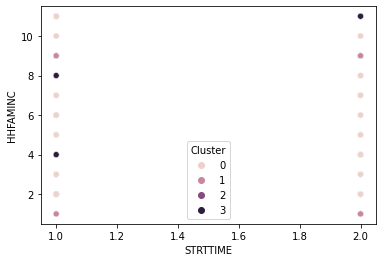

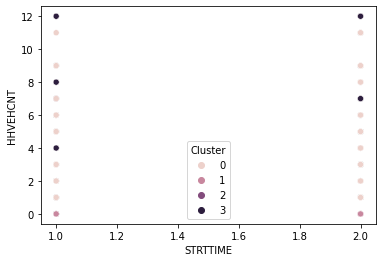

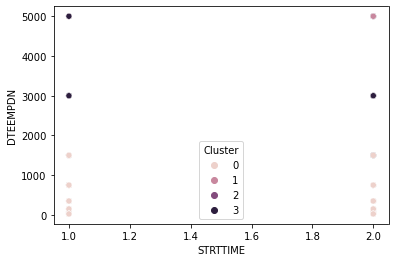

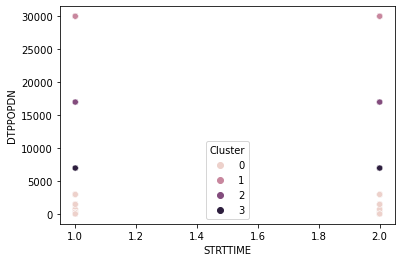

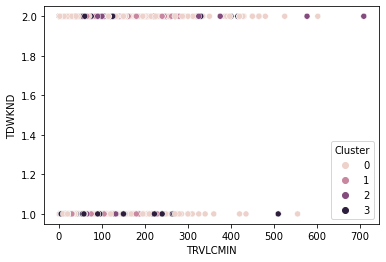

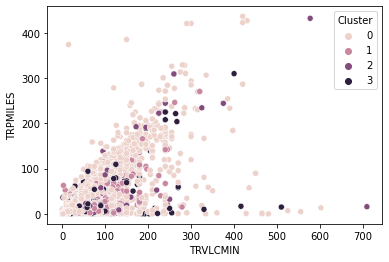

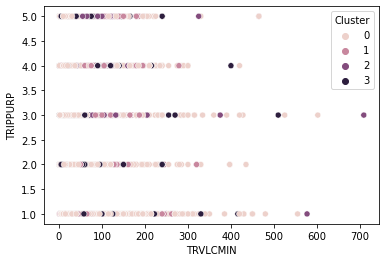

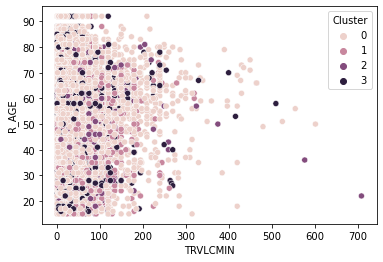

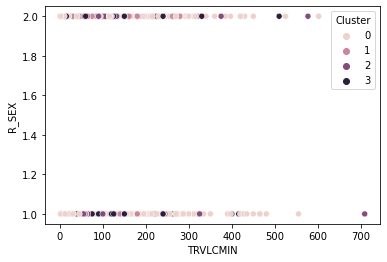

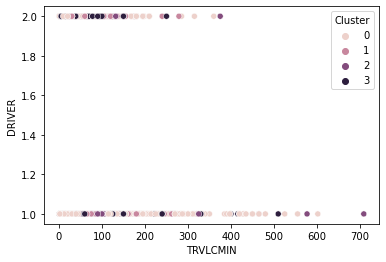

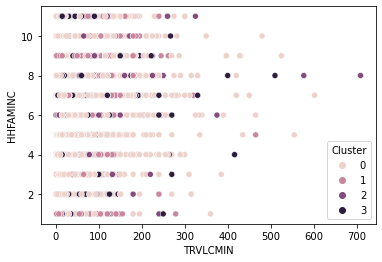

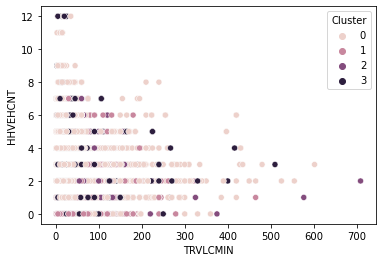

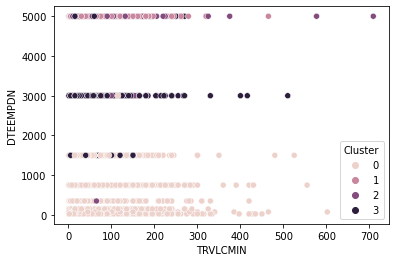

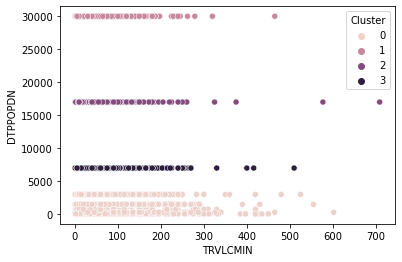

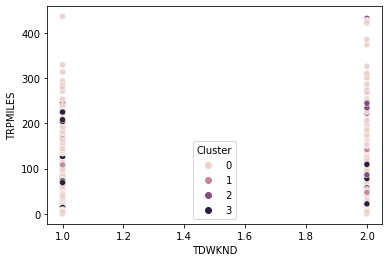

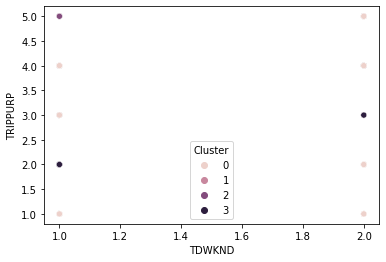

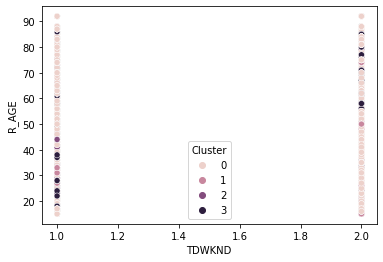

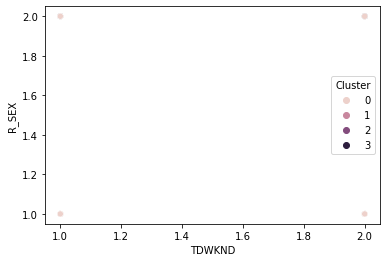

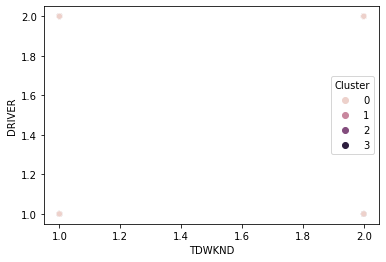

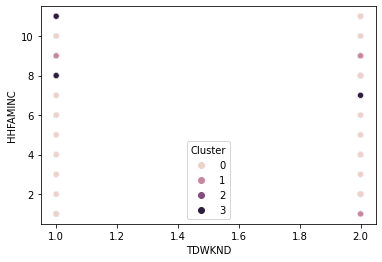

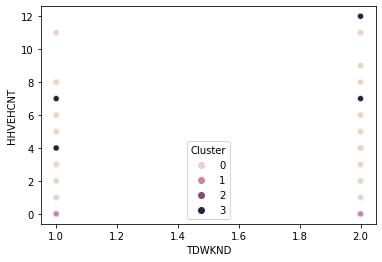

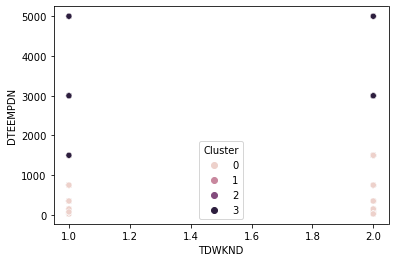

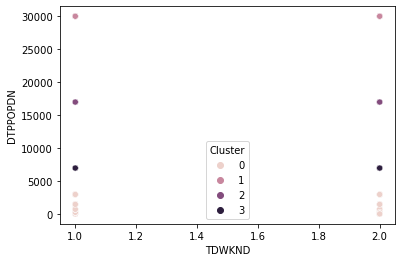

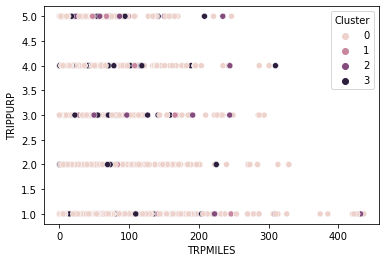

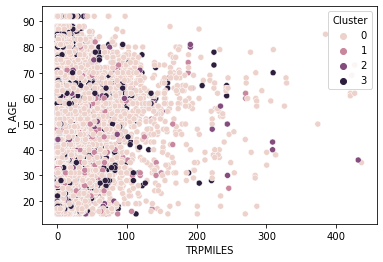

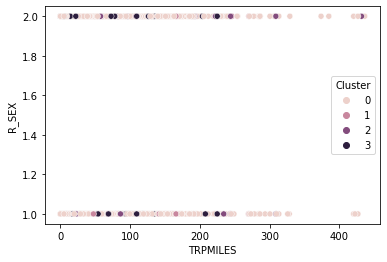

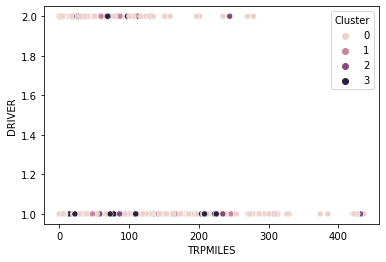

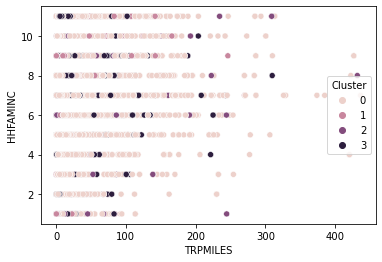

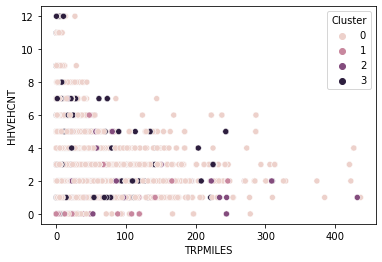

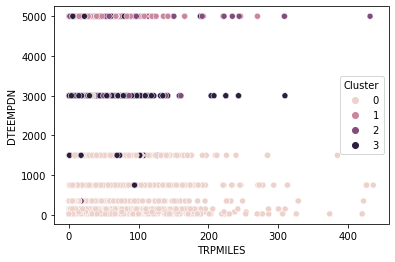

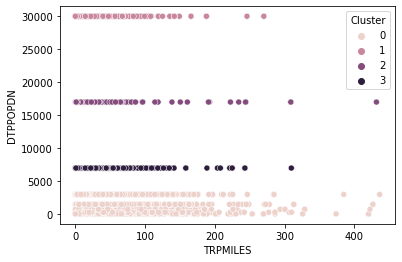

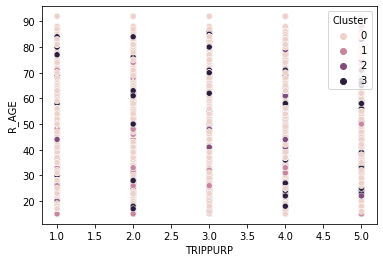

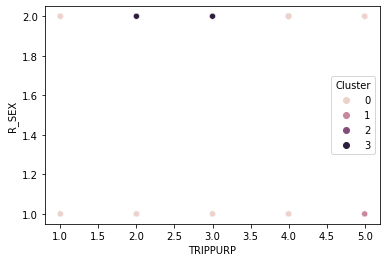

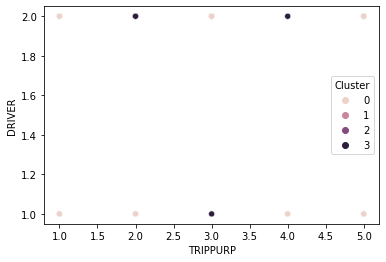

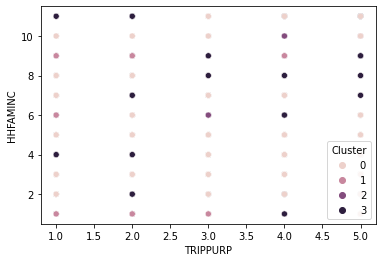

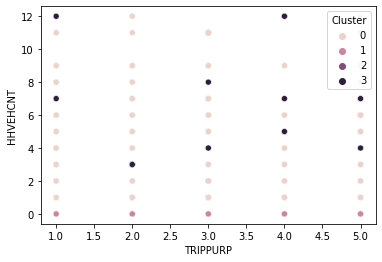

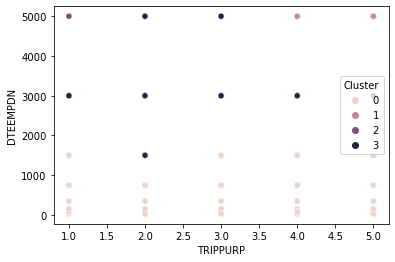

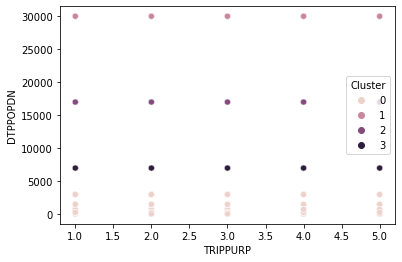

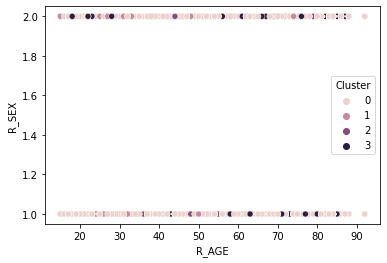

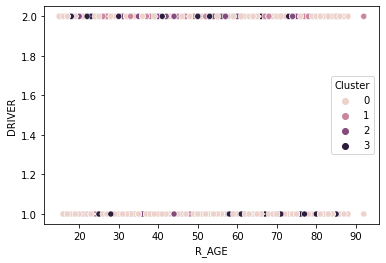

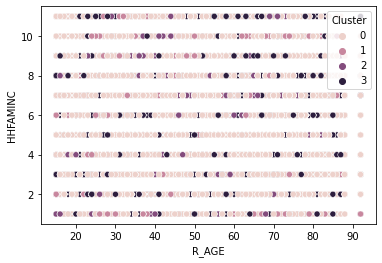

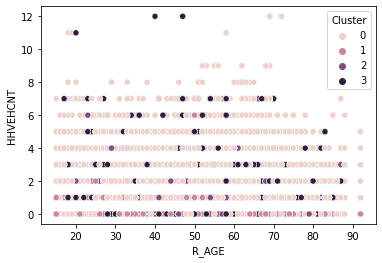

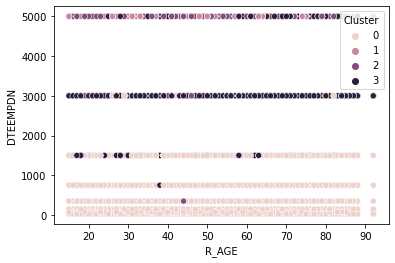

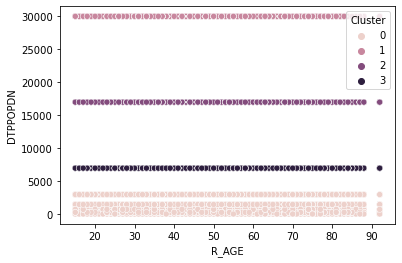

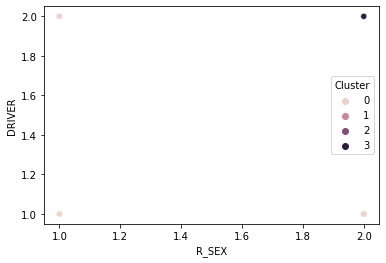

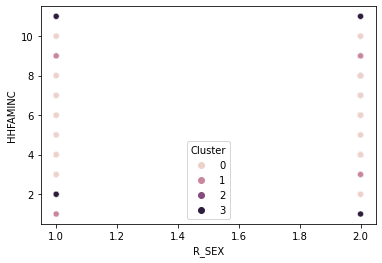

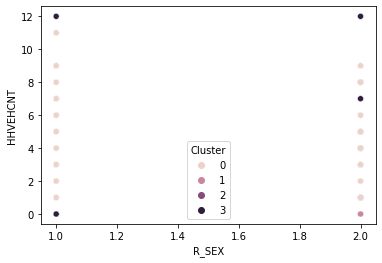

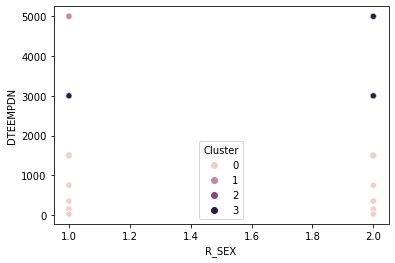

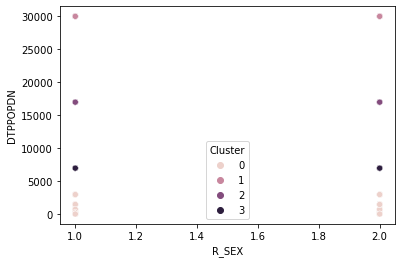

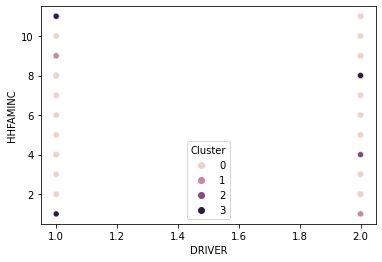

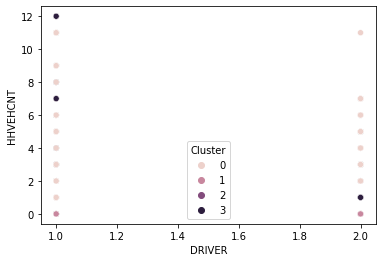

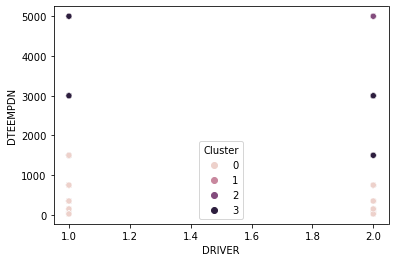

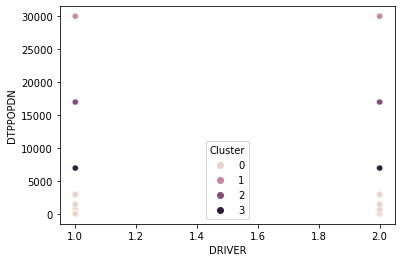

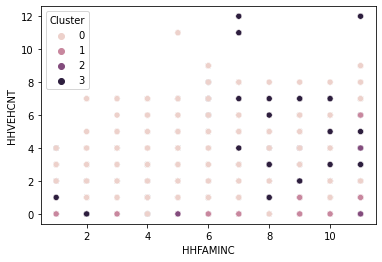

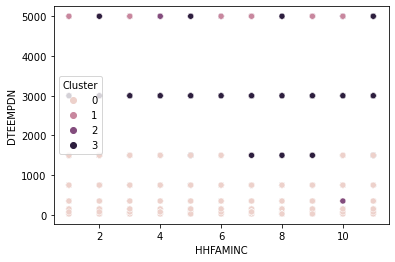

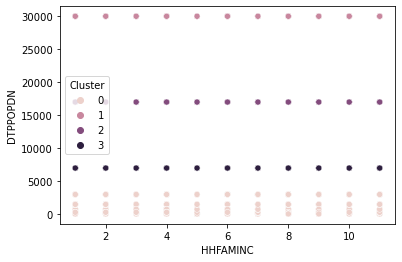

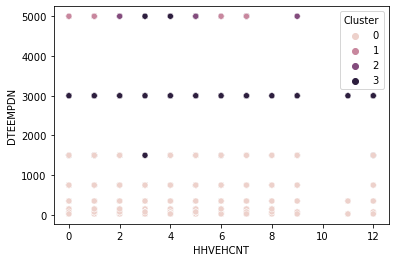

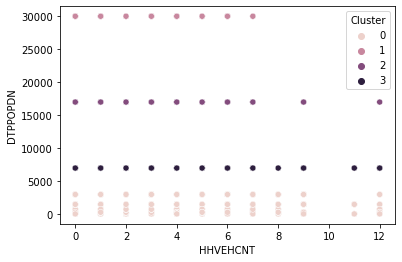

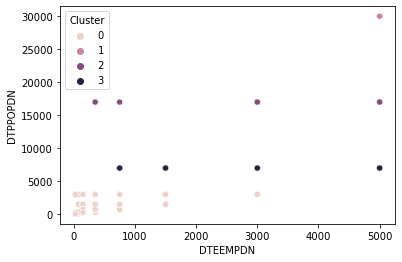

In [55]:
for combo_index in range(len(list_of_combo_columns)):
    plt.figure(combo_index)
    combo = list_of_combo_columns[combo_index]
    sns.scatterplot(data=unsup_df, x=combo[0], y=combo[1], hue='Cluster')

# Clusters Centers

In [56]:
kmeans_clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=unsup_col)

In [57]:
kmeans_clusters_centers

,DWELTIME,STRTTIME,TRVLCMIN,TDWKND,TRPMILES,TRIPPURP,R_AGE,R_SEX,DRIVER,HHFAMINC,HHVEHCNT,DTEEMPDN,DTPPOPDN
0,109.912999,1.719014,18.881310,1.715974,8.365489,2.282926,54.561277,1.522765,1.046354,6.586451,2.173500,548.394099,1173.915117
1,136.162378,1.704000,28.922162,1.743568,6.433106,2.299027,48.827459,1.538162,1.265946,7.006703,1.044108,5000.000000,30000.000000
2,132.166533,1.710308,22.688086,1.728782,6.690848,2.400268,51.483266,1.517805,1.137082,6.713253,1.718876,4801.820616,17000.000000
3,114.528596,1.697127,17.774546,1.730869,5.975729,2.305827,53.083236,1.543095,1.088248,6.451893,1.900564,3099.346639,7000.000000
